In [177]:
import numpy as np
import importlib
import Hamilton as hm
importlib.reload(hm)
importlib.reload(an)
import Ansatz as an
from qiskit import *
from qiskit.visualization import plot_histogram
from qiskit.primitives import Estimator
from qiskit.algorithms import VarQITE
from qiskit.algorithms.time_evolvers.variational import ImaginaryMcLachlanPrinciple
from qiskit.algorithms import TimeEvolutionProblem
from qiskit.quantum_info import *
import pylab
from qiskit.algorithms import SciPyImaginaryEvolver
from qiskit.quantum_info import Statevector
import matplotlib.pyplot as plt

from qiskit_aer import AerSimulator
from qiskit.circuit import Parameter





## evolution

In [172]:
depth = 4
qubits = 3
I_1 =["III"]
I_2 = [1.0]
hamiltonian = Operator(np.kron(hm.Ham(3,1,2),hm.krId(3)))
var_principle = ImaginaryMcLachlanPrinciple()
time = 0.2
aux_ops = [hamiltonian]
init_param_values =  [np.pi/2]*qubits + [0]*(depth*qubits*2+qubits)
ansatz = an.ansatz_review_exact(qubits*2,depth)
evolution_problem = TimeEvolutionProblem(hamiltonian, time, aux_operators=aux_ops)
var_qite = VarQITE(ansatz, init_param_values, var_principle, Estimator())
evolution_result = var_qite.evolve(evolution_problem)



θ_ 
θ_
θ_
θ_
θ_
θ_


In [173]:
init_state = Statevector(ansatz.assign_parameters(init_param_values))
evolution_problem = TimeEvolutionProblem(hamiltonian, time, initial_state=init_state, aux_operators=aux_ops)
exact_evol = SciPyImaginaryEvolver(num_timesteps=int(time * 100))
sol = exact_evol.evolve(evolution_problem)

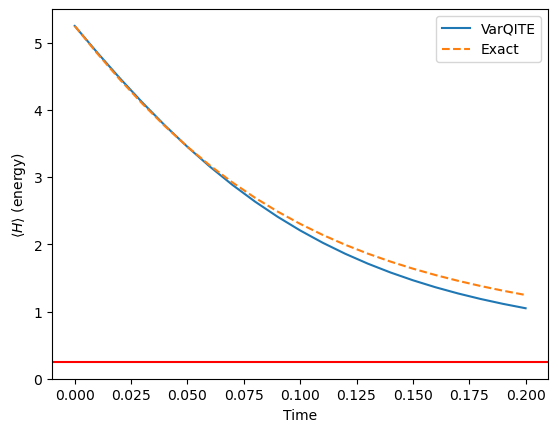

In [174]:
h_exp_val = np.array([ele[0][0] for ele in evolution_result.observables])

exact_h_exp_val = sol.observables[0][0].real

times = evolution_result.times
pylab.plot(times, h_exp_val, label= "VarQITE")
pylab.plot(times, exact_h_exp_val , label= "Exact",  linestyle='--')
plt.axhline(y=0.25, color='r', linestyle='-')
pylab.xlabel("Time")
pylab.ylabel(r"$\langle H \rangle$ (energy)")
pylab.legend(loc="upper right");

In [175]:
param = evolution_result.parameter_values[int(time*100)][:]
evolved_state = evolution_result.evolved_state
#circuit_mes = an.ansatz_review_exact(qubits*2,depth).bind_parameters(param) +measure(6)

In [57]:
binded = an.ansatz_review_exact(6,4).bind_parameters(param)
state = Statevector(binded)
estimator = Estimator()
op = hm.create_Hamilton_2(2)
expectation_value = estimator.run(ansatz, op).result().values

# for shot-based simulation:
expectation_value = estimator.run(state, op, shots=100).result().values

ValueError: The number of values (0) does not match the number of parameters (30) for the 0-th circuit.

In [57]:
print(1/((np.trace(np.exp(-4*hm.Ham(2,1,2)))))*np.trace(np.exp(-4*hm.Ham(2,1,2))*hm.Ham(2,1,2)))

(0.25067070026093297+0j)


0.5824203749993038

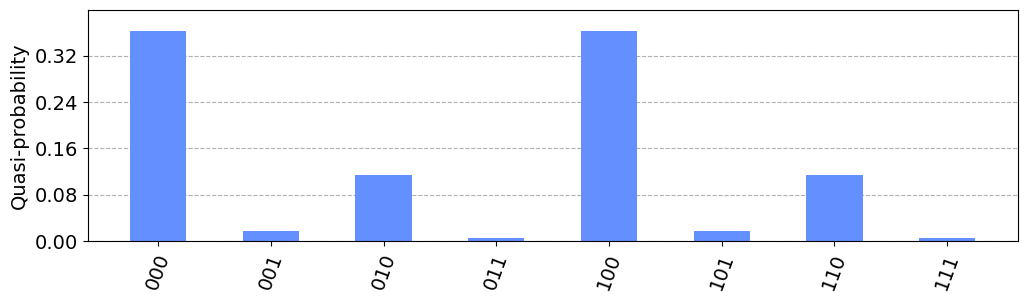

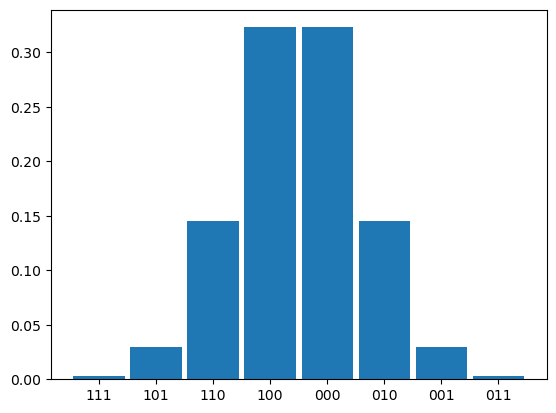

In [176]:
abcd = Statevector(evolved_state).probabilities_dict([0,1,2])
scipy_result = Statevector(sol.evolved_state).probabilities_dict([0,1,2])
plot_histogram(dict_2,figsize= (12,3),sort='asc',bar_labels=False)

x=["111","101","110","100","000","010","001","011","001"]
y=[]
for i in range(len(x)):
    y.append(dict_2[x[i]])

plt.bar(x, y, width=0.9)


plot_histogram(abcd,figsize= (12,3),sort='asc',bar_labels=False)


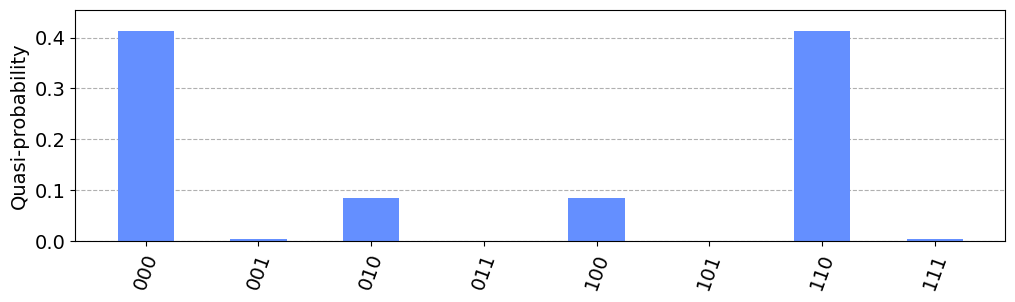

In [144]:
qubits =3
theta = [np.pi/2]*qubits + [0]*(depth*qubits*2+qubits)

print(theta)

parameters = 

[1.5707963267948966, 1.5707963267948966, 1.5707963267948966, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


θ_ 
θ_
θ_
θ_
θ_
θ_


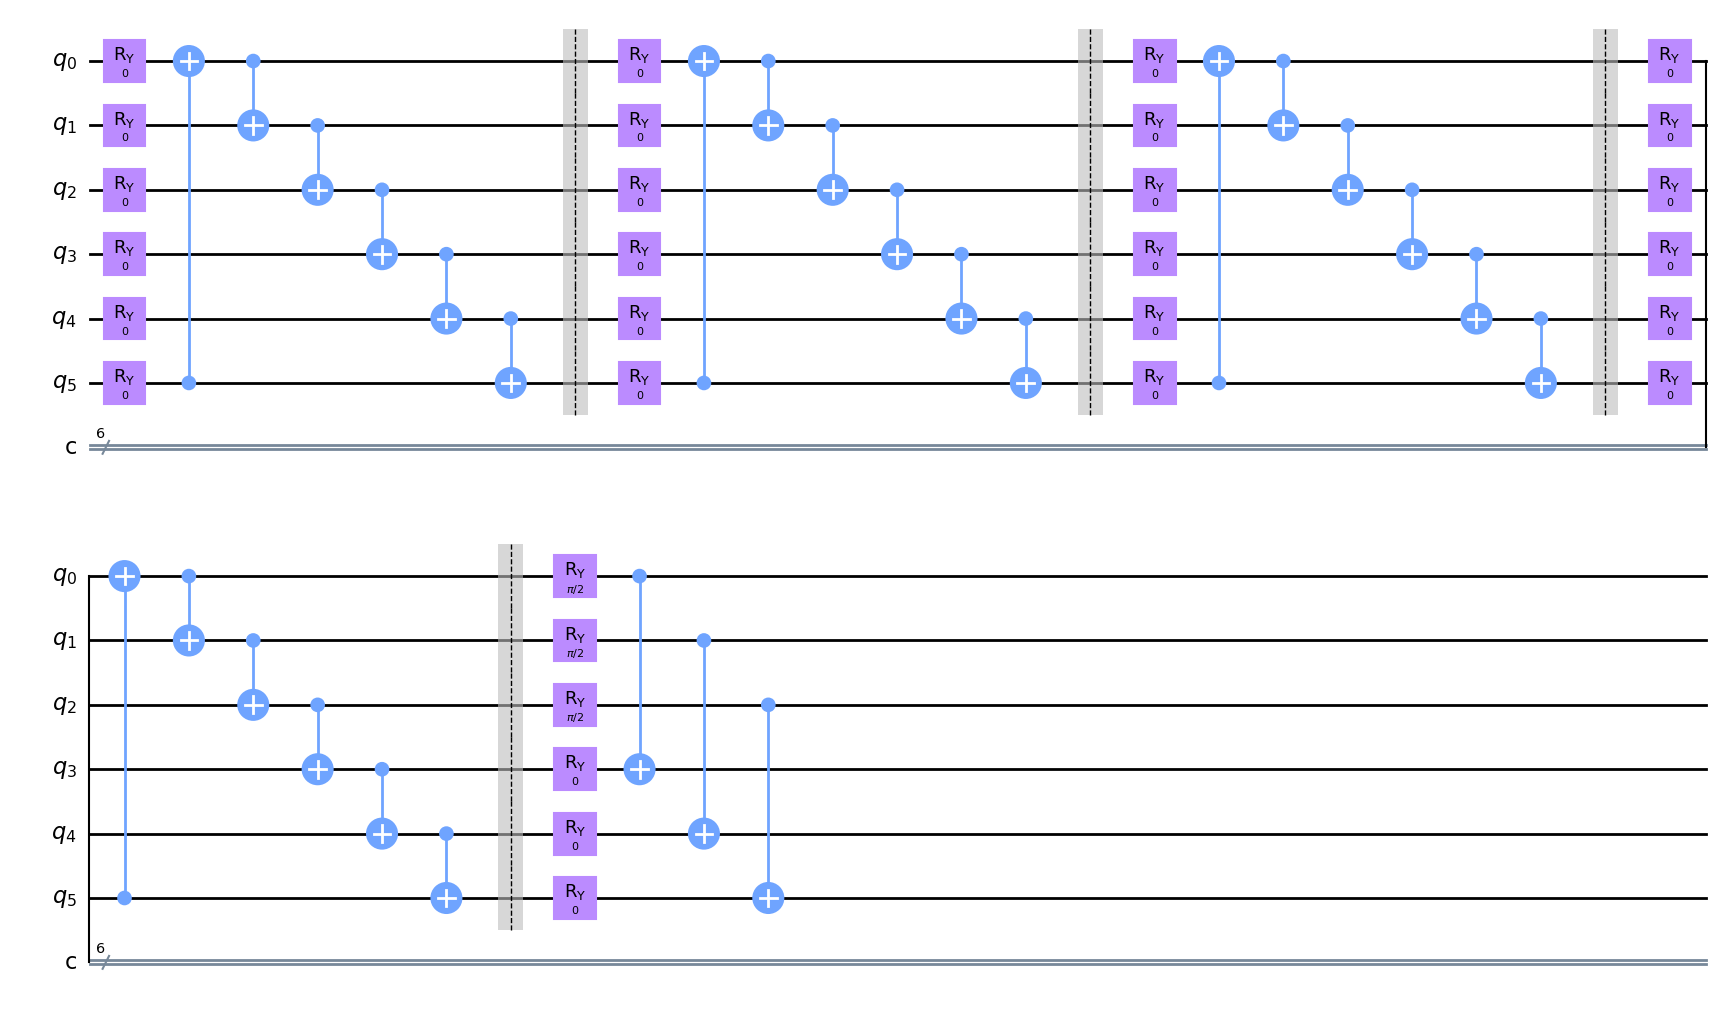

In [164]:
an.ansatz_review_exact(6,4).bind_parameters(theta).draw("mpl")

In [156]:
an.ansatz_review_exact(6,4).draw("mpl")

for i in range(len(circuit.parameters)):
    if circuit.parameters[i].name == "θ_0" or circuit.parameters[i].name == "θ_1" or circuit.parameters[i].name == "θ_0" :
        circuit.assign_parameters({circuit.parameters[i]: np.pi/2}, inplace=True)
    else:
        circuit.assign_parameters({circuit.parameters[i]: 0}, inplace= True)

θ_0
θ_1
θ_2
θ_3
θ_4
θ_5


IndexError: list index out of range

/Users/salsa/anaconda3/envs/MatrixModels/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 6 () missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/salsa/anaconda3/envs/MatrixModels/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 7 () missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/salsa/anaconda3/envs/MatrixModels/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 8 ) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/salsa/anaconda3/envs/MatrixModels/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 9 (	) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/salsa/anaconda3/envs/MatrixModels/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 11 () missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/salsa/anaconda

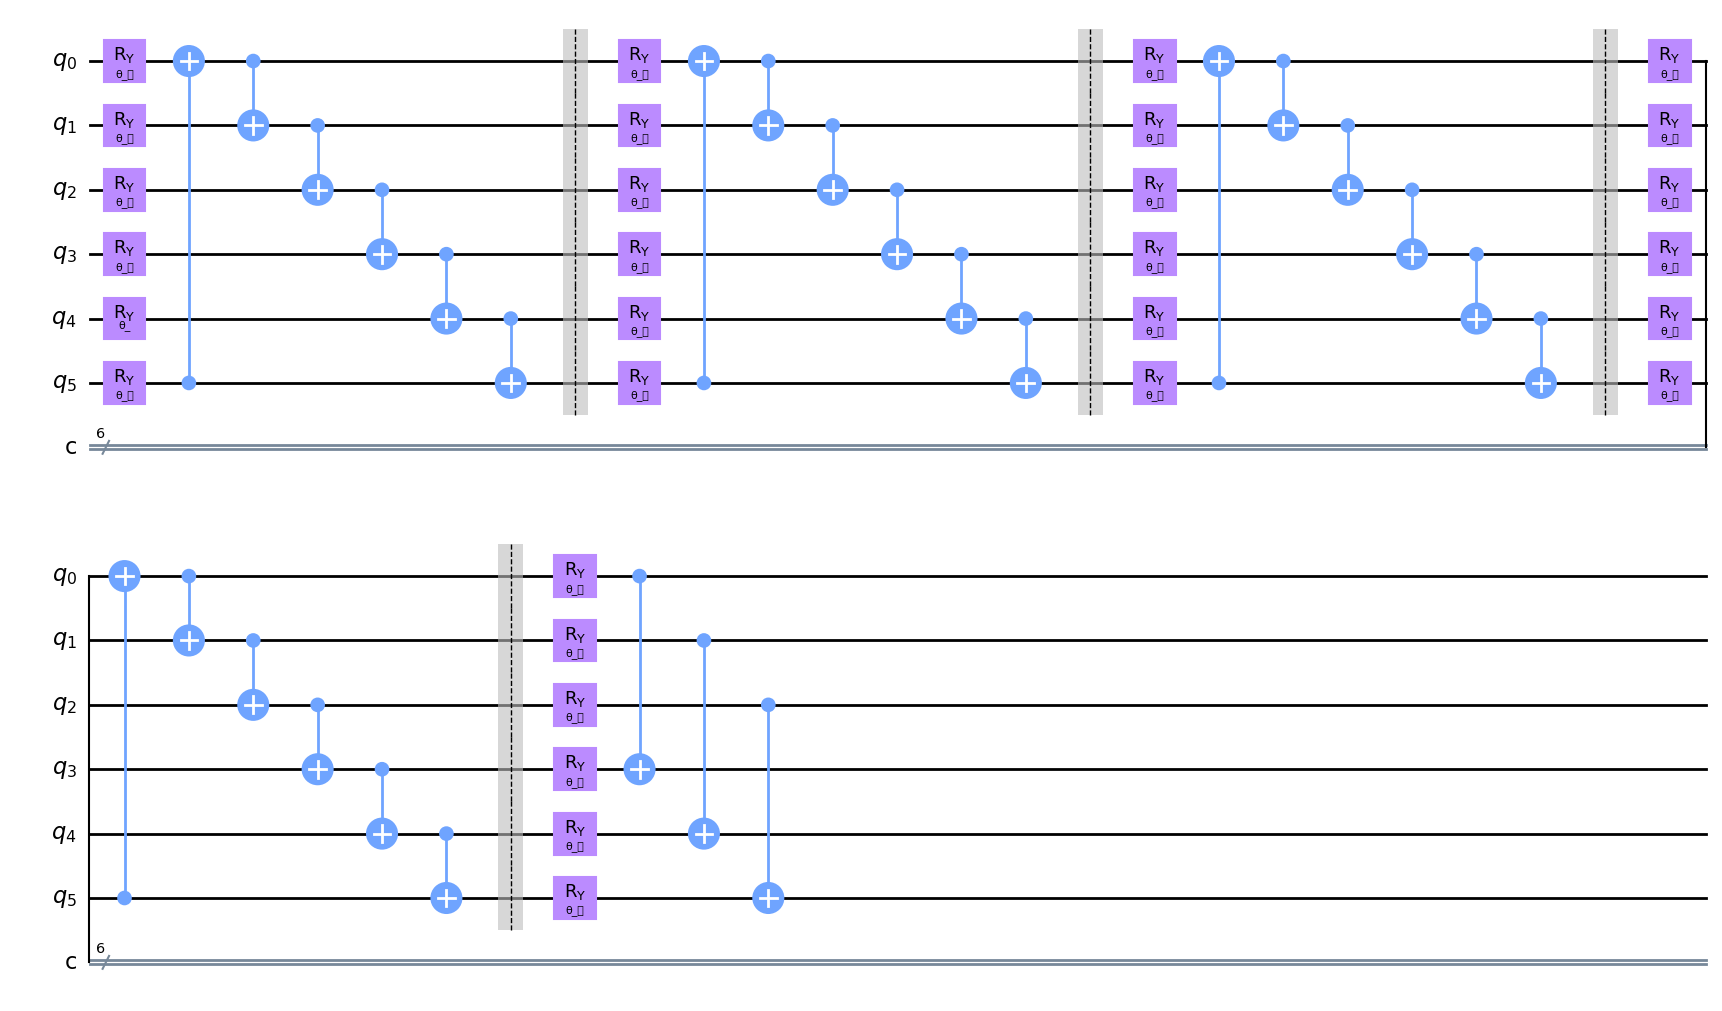

In [162]:
circuit.draw("mpl")

In [122]:
''

[1.5707963267948966,
 1.5707963267948966,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1.5707963267948966,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0]

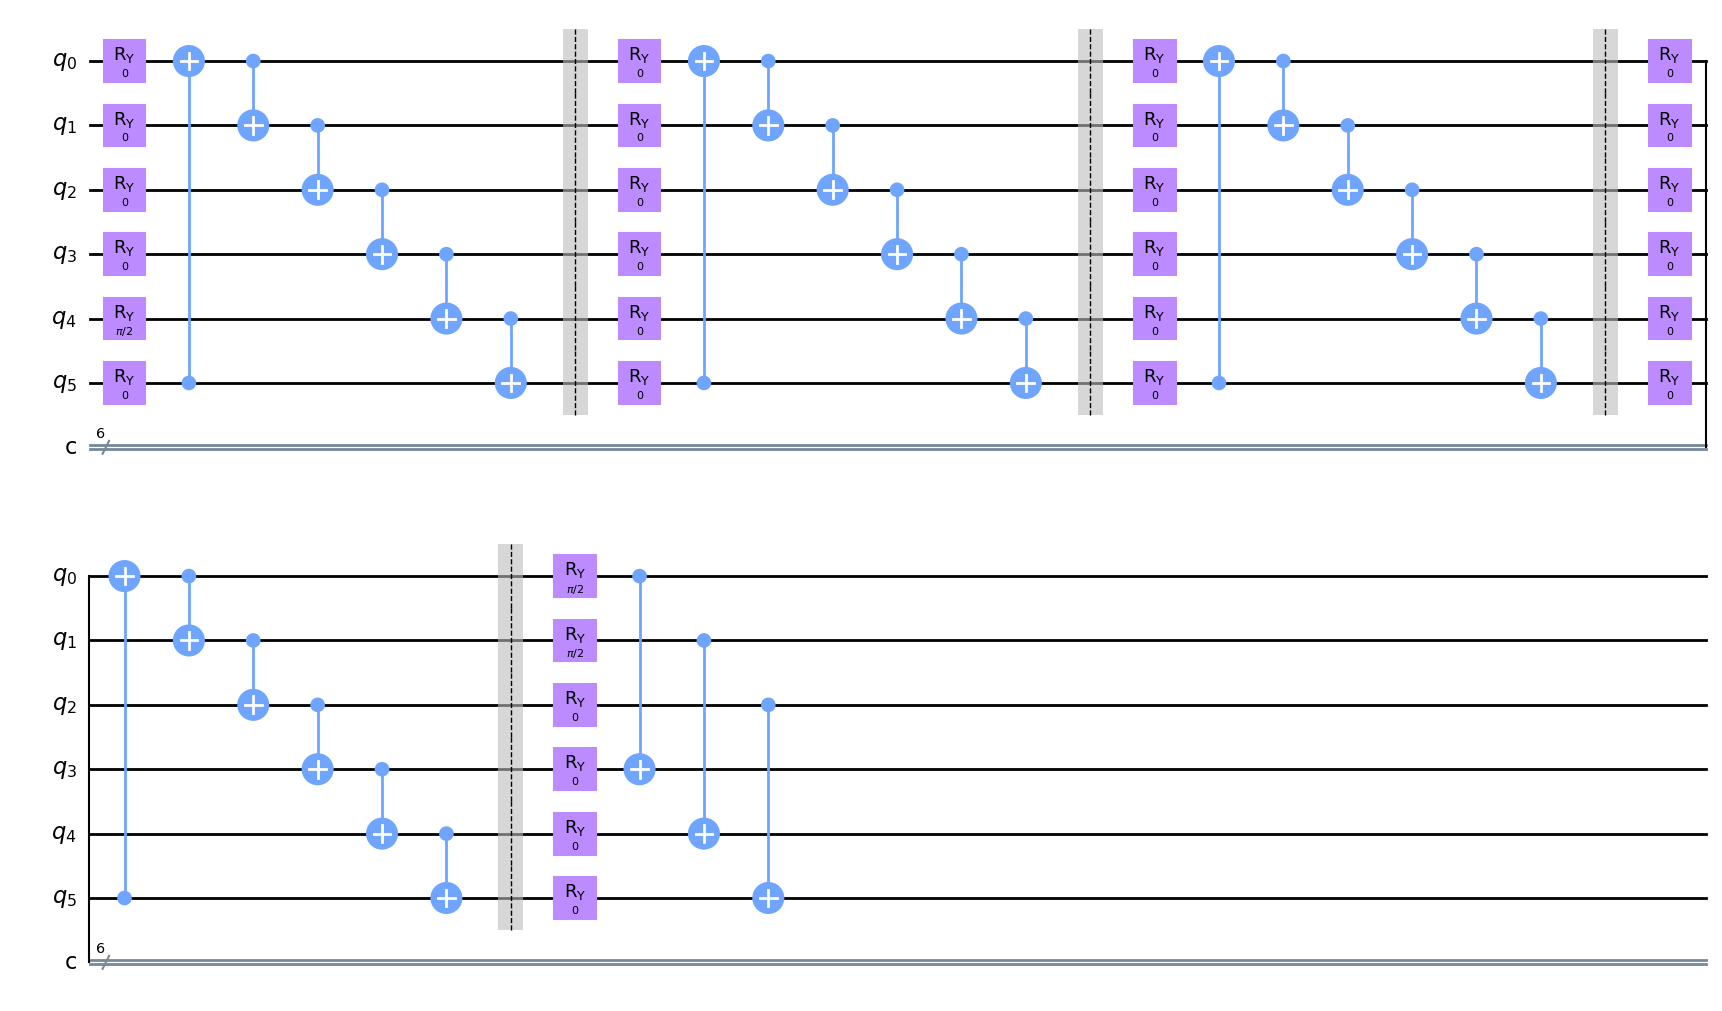

In [148]:
circuit.assign_parameters({circuit.parameters[i]: theta[i] for i in range(len(theta))}).draw("mpl")


In [150]:
print(circuit.parameters[0].name)

θ_0
